#### E-Commerce Shipping

#### Column Defination
* ID: Unique identification of customer .
* Warehouse block: The Company Warehouse is divided into differnt block. For example:  A,B,C,D,E.
* Mode of shipment: The company has different mode of shipment like Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: Customer review . 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Total Cost of the Product in USD.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The compnay has prioritize the product in parameter like low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that product.
* Weight in gms: weight in grams.
* Reached on time: target variable, where 1 Indicates that the product has NOT delivered on time and 0 indicates it has delivered on time.

**Loading data**

In [16]:
#Import the require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv("sample_data/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Preliminary Data Analysis**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [19]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Checking the Missing Values**

In [20]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There is no missing value in the datasets as you can see all the values has 0 missing data.

**Checking Duplicate Values**

In [21]:
df.duplicated().sum()

0

Hence, there is no any duplicate values in datasets

In [22]:
# change the target
df.rename(columns={'Reached.on.Time_Y.N':'Target'},inplace=True)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


 Rename the column for easiness for future from 'Reached.on.Time_Y.N' to 'Target'

In [23]:
df.drop(columns={'ID','Gender'},inplace=True,axis=1)

ID and Gender doesnot make any sence for our further analysis so we are removing it

In [24]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


Exploratory Data Analysis

In [25]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms', 'Target'],
      dtype='object')

<AxesSubplot:>

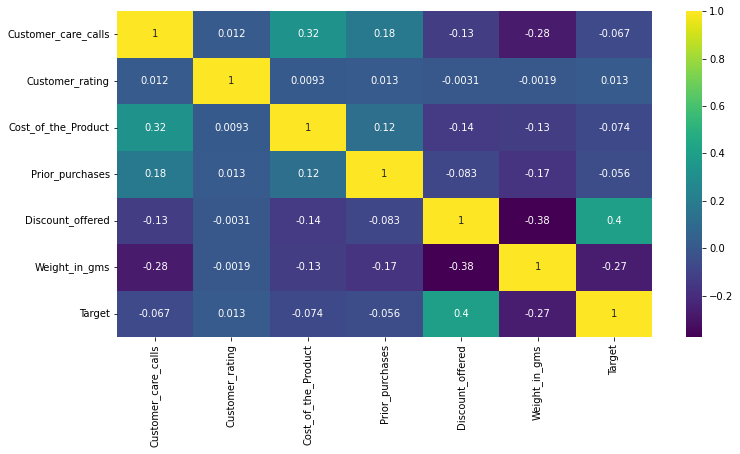

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

analysing the correlation to identify the statistical relationship between the columns in the dataset. According to the correlation heatmap above we find that target has highly correlated with discount offers.

**Univariate analysis of Categorical Features**

we calculate the distribution of categorical variable i.e Warehouse_block,Mode_of_Shipment,Product_importance  block which is plot in histogram below

In [27]:
df.Warehouse_block.value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

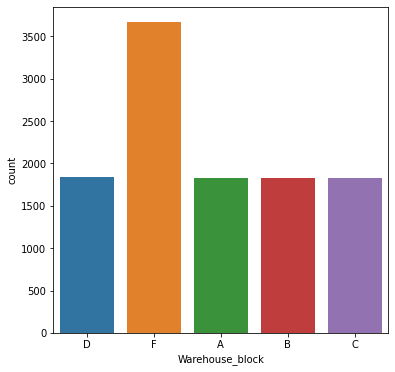

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Warehouse_block')

In [29]:
df.Mode_of_Shipment.value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

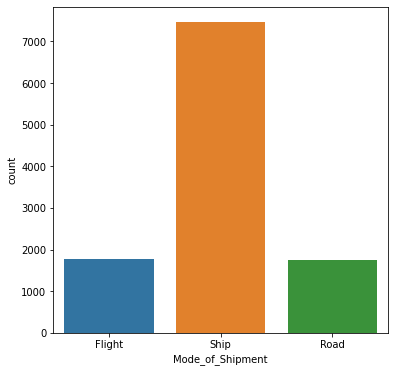

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Mode_of_Shipment')

In [31]:
df.Product_importance.value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

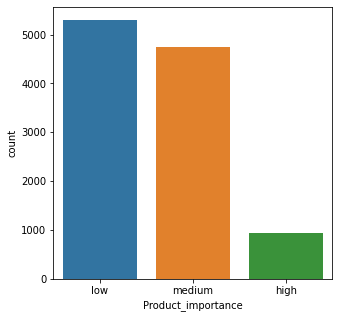

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Product_importance')

evaluating the min, maximum and mean value of numercal variable i.e  Customer_care_calls,Customer_rating,Prior_purchases and plotting it in graph


In [33]:
c_list = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']

for i in c_list :
    min_value = df[i].min()
    max_value = df[i].max()
    mean_value = df[i].mean()

    print('Minimum ' + i + ' : ',min_value)
    print('Maximum ' + i + ' : ',max_value)
    print('Average ' + i + ' : ',mean_value)
    print("---------------------------------------------------------")

Minimum Customer_care_calls :  2
Maximum Customer_care_calls :  7
Average Customer_care_calls :  4.054459496317847
---------------------------------------------------------
Minimum Customer_rating :  1
Maximum Customer_rating :  5
Average Customer_rating :  2.9905445949631786
---------------------------------------------------------
Minimum Prior_purchases :  2
Maximum Prior_purchases :  10
Average Prior_purchases :  3.5675970542776616
---------------------------------------------------------


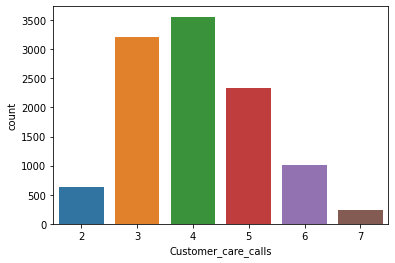

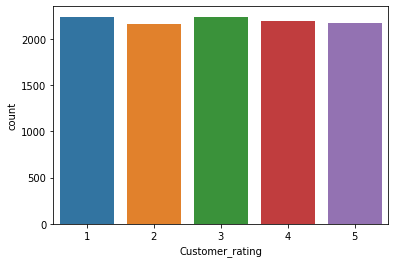

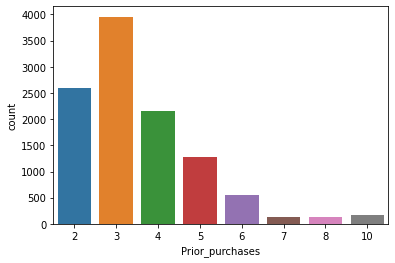

In [34]:
for x in c_list:

    sns.countplot(data=df, x=x)

    plt.show()

**Univariate Analysis of Numerical Features**

In [35]:
num_list = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [36]:


for i in num_list :
    min_value = df[i].min()
    max_value = df[i].max()
    mean_value = df[i].mean()

    print('Minimum ' + i + ' : ',min_value)
    print('Maximum ' + i + ' : ',max_value)
    print('Average ' + i + ' : ',mean_value)
    print("---------------------------------------------------------")

Minimum Cost_of_the_Product :  96
Maximum Cost_of_the_Product :  310
Average Cost_of_the_Product :  210.19683607600692
---------------------------------------------------------
Minimum Discount_offered :  1
Maximum Discount_offered :  65
Average Discount_offered :  13.37321574688608
---------------------------------------------------------
Minimum Weight_in_gms :  1001
Maximum Weight_in_gms :  7846
Average Weight_in_gms :  3634.016728793527
---------------------------------------------------------


C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


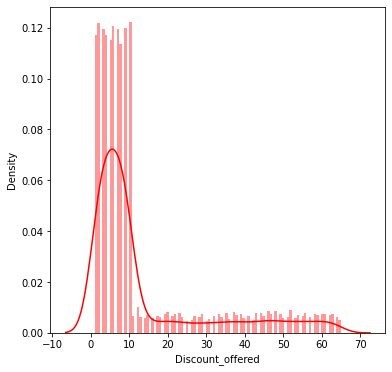

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(df['Discount_offered'],bins=100,color='r')
plt.show()

the distributin of the discount_offered is right skewed which shows that more discount rates lies in 0 to 10

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


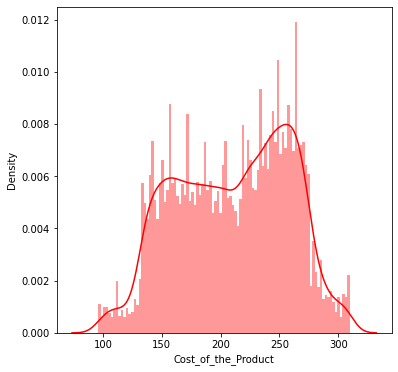

In [38]:
plt.figure(figsize=(6,6))
sns.distplot(df['Cost_of_the_Product'],bins=100,color='r')
plt.show()

cost of product is normally distributed

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


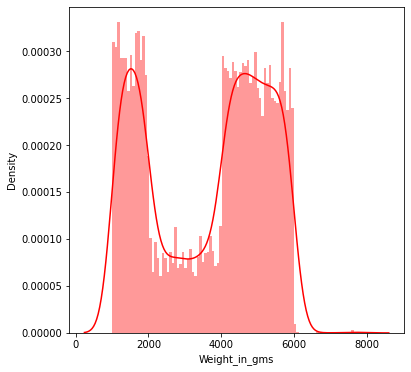

In [39]:
plt.figure(figsize=(6,6))
sns.distplot(df['Weight_in_gms'],bins=100,color='r')
plt.show()

there is huge distribution of weight, which mean majority of products are either heavyweight or light weight

Bivariate analysis

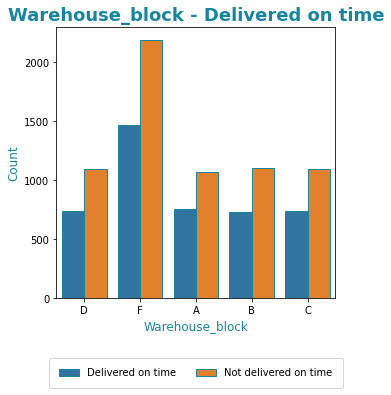

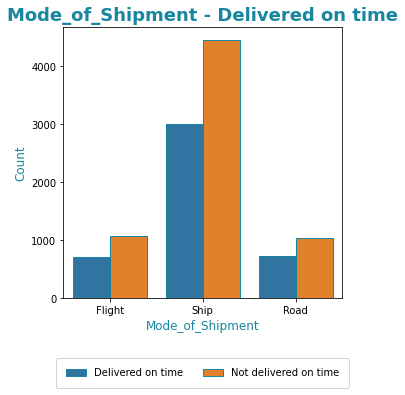

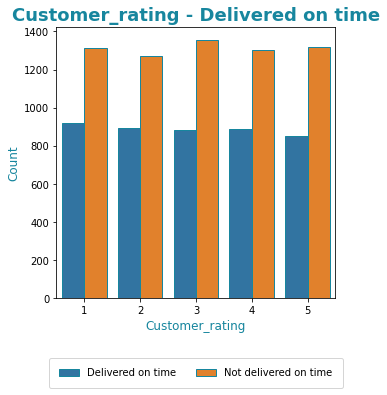

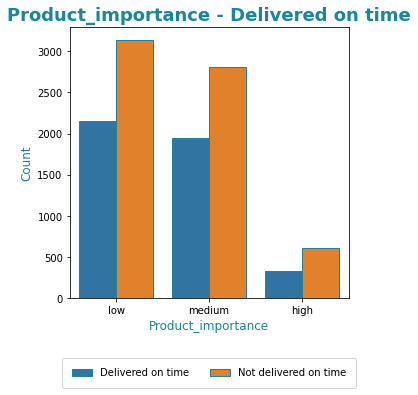

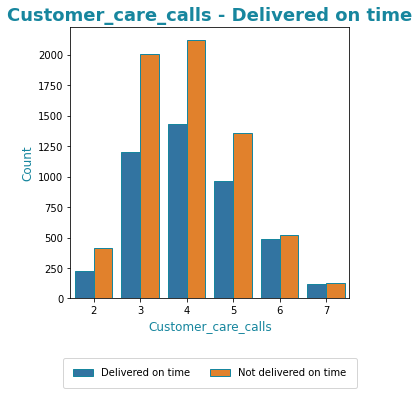

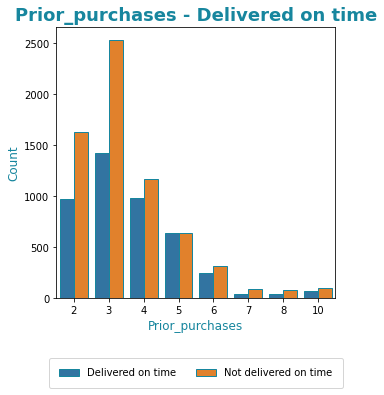

In [40]:
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
features = ["Warehouse_block","Mode_of_Shipment","Customer_rating","Product_importance","Customer_care_calls","Prior_purchases"]

for f in features:
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.countplot(x=f,data=df,hue="Target",edgecolor=colors_mix[0])
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
    plt.ylabel("Count",fontsize=12, fontweight='light', color=colors_mix[0])
    plt.xlabel(f"{f}",fontsize=12, fontweight='light', color=colors_mix[0])
    plt.title("{} - Delivered on time".format(f), fontsize=18, fontweight='bold', color=colors_mix[0])


**Outlier Detection**

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


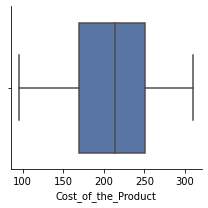

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


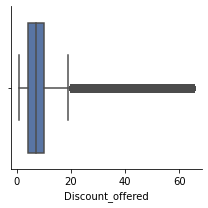

C:\Users\forev\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


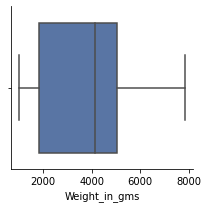

In [41]:
outlier_feat = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]
for j in outlier_feat:
    of = sns.FacetGrid(df)
    of.map(sns.boxplot, j,palette="deep")
    plt.show()

It seems like we have a lot of outliers for discount offered but we might have some outliers for other features as well. therefore we find z score to drop outliers

In [42]:
from scipy.stats import zscore

z = np.abs(zscore(df[outlier_feat]))
df_new = df[(z<3).all(axis=1)]

In [43]:
df_new.shape


(10818, 10)

**Data Preprocessing and Feature Engineering**

In [44]:
df_new.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


In [45]:
#label encoding of the three categorical variables
cat_list = ['Warehouse_block','Mode_of_Shipment','Product_importance']
num_list = ['Discount_offered','Weight_in_gms','Cost_of_the_Product']

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_list:
    df_new[i] = le.fit_transform(df_new[i])


C:\Users\forev\AppData\Local\Temp\ipykernel_29488\1070045741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = le.fit_transform(df_new[i])


In [47]:
df_new.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Target
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


In [48]:
#normmalization of the three numerical variables to improve model performance
#Step 2: Preprocessing Scaler
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_numerical = scaler.fit_transform(df_new[num_list])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=num_list)

In [49]:
scaled_numerical_df.head()

,Discount_offered,Weight_in_gms,Cost_of_the_Product
0,2.100090,-1.480618,-0.695769
1,3.101302,-0.347017,0.115762
2,2.367080,-0.172241,-0.570918
3,-0.169324,-1.514840,-0.716578
4,2.233585,-0.716125,-0.550110


In [50]:
unscaled_df = df_new.drop(num_list,axis=1)
unscaled_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Target
0,3,0,4,2,3,1,1
1,4,0,4,5,2,1,1
2,0,0,2,2,4,1,1
3,1,0,3,3,4,2,1
4,2,0,2,2,3,2,1


In [51]:
final_df = pd.concat([unscaled_df,scaled_numerical_df],axis=1)
final_df.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Target,Discount_offered,Weight_in_gms,Cost_of_the_Product
0,3.0,0.0,4.0,2.0,3.0,1.0,1.0,2.100090,-1.480618,-0.695769
1,4.0,0.0,4.0,5.0,2.0,1.0,1.0,3.101302,-0.347017,0.115762
2,0.0,0.0,2.0,2.0,4.0,1.0,1.0,2.367080,-0.172241,-0.570918
3,1.0,0.0,3.0,3.0,4.0,2.0,1.0,-0.169324,-1.514840,-0.716578
4,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.233585,-0.716125,-0.550110


In [52]:
final_df.isna().sum()

Warehouse_block        181
Mode_of_Shipment       181
Customer_care_calls    181
Customer_rating        181
Prior_purchases        181
Product_importance     181
Target                 181
Discount_offered       181
Weight_in_gms          181
Cost_of_the_Product    181
dtype: int64

In [53]:
final_df = final_df.dropna()
final_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Target,Discount_offered,Weight_in_gms,Cost_of_the_Product
0,3.0,0.0,4.0,2.0,3.0,1.0,1.0,2.100090,-1.480618,-0.695769
1,4.0,0.0,4.0,5.0,2.0,1.0,1.0,3.101302,-0.347017,0.115762
2,0.0,0.0,2.0,2.0,4.0,1.0,1.0,2.367080,-0.172241,-0.570918
3,1.0,0.0,3.0,3.0,4.0,2.0,1.0,-0.169324,-1.514840,-0.716578
4,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.233585,-0.716125,-0.550110


In [54]:
final_df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Prior_purchases        0
Product_importance     0
Target                 0
Discount_offered       0
Weight_in_gms          0
Cost_of_the_Product    0
dtype: int64

In [55]:
#X AND y
X = final_df.drop(['Target'],axis=1)
y = final_df['Target']

In [56]:
X.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
Cost_of_the_Product    0
dtype: int64

In [57]:
# In the first step we will split the data in training and remaining dataset
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)


# Now since we want the valid and test size to be equal (10% each of overall data).

# we have to define valid_size=0.5 (that is 50% of remaining data)

test_size = 0.5

X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [58]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [59]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.640038,0.684543,0.703404,0.693845


In [60]:
#Model Architecure
from keras.models import Sequential
from keras.layers import Dense
#Create the ANN
model= Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Step 3: Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training
history=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Prediction
y_pred = model.predict(X_test)

Epoch 1/10
266/266 [==============================] - 1s 1ms/step - loss: 0.5871 - accuracy: 0.6233 - val_loss: 0.5451 - val_accuracy: 0.6372
Epoch 2/10
266/266 [==============================] - 0s 781us/step - loss: 0.5570 - accuracy: 0.6251 - val_loss: 0.5414 - val_accuracy: 0.6541
Epoch 3/10
266/266 [==============================] - 0s 804us/step - loss: 0.5514 - accuracy: 0.6296 - val_loss: 0.5397 - val_accuracy: 0.6382
Epoch 4/10
266/266 [==============================] - 0s 821us/step - loss: 0.5470 - accuracy: 0.6406 - val_loss: 0.5389 - val_accuracy: 0.6447
Epoch 5/10
266/266 [==============================] - 0s 762us/step - loss: 0.5450 - accuracy: 0.6398 - val_loss: 0.5413 - val_accuracy: 0.6344
Epoch 6/10
266/266 [==============================] - 0s 786us/step - loss: 0.5439 - accuracy: 0.6371 - val_loss: 0.5560 - val_accuracy: 0.6062
Epoch 7/10
266/266 [==============================] - 0s 765us/step - loss: 0.5414 - accuracy: 0.6465 - val_loss: 0.5350 - val_accuracy: 0

**Comparision of logistic Regression and first artificial neural network:**


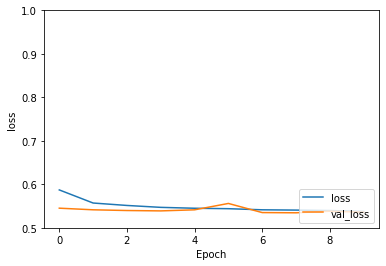

In [61]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label ='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [62]:
#Model Architecure
from keras.models import Sequential
from keras.layers import Dense
#Create the ANN
model= Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X.shape[1],)))

# Add  hidden layers 1
model.add(Dense(units=32, activation='relu'))

# Add  hidden layers 2
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Step 3: Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training
history2 =model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Prediction
y_pred = model.predict(X_test)

Epoch 1/20
266/266 [==============================] - 1s 1ms/step - loss: 0.5803 - accuracy: 0.6251 - val_loss: 0.5446 - val_accuracy: 0.6494
Epoch 2/20
266/266 [==============================] - 0s 895us/step - loss: 0.5536 - accuracy: 0.6327 - val_loss: 0.5488 - val_accuracy: 0.6466
Epoch 3/20
266/266 [==============================] - 0s 893us/step - loss: 0.5510 - accuracy: 0.6332 - val_loss: 0.5389 - val_accuracy: 0.6335
Epoch 4/20
266/266 [==============================] - 0s 864us/step - loss: 0.5492 - accuracy: 0.6347 - val_loss: 0.5379 - val_accuracy: 0.6504
Epoch 5/20
266/266 [==============================] - 0s 872us/step - loss: 0.5459 - accuracy: 0.6357 - val_loss: 0.5344 - val_accuracy: 0.6673
Epoch 6/20
266/266 [==============================] - 0s 851us/step - loss: 0.5434 - accuracy: 0.6405 - val_loss: 0.5368 - val_accuracy: 0.6363
Epoch 7/20
266/266 [==============================] - 0s 874us/step - loss: 0.5445 - accuracy: 0.6332 - val_loss: 0.5330 - val_accuracy: 0

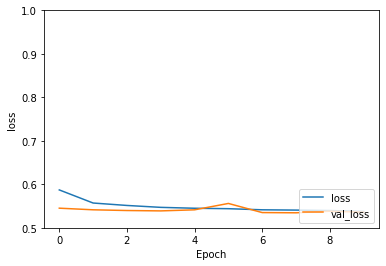

In [63]:

plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label ='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Evaluation and Conclusion;
In Conlusion, The logistic Regression gave us accuracy of about 63% After that  we implement the ANN Model for neuro Network with 3 dense layer and 10 epoch. We found that this model gave us only 64% accuracy.

Futhermore, we add more dense layer and increase the epoch to 20 and runs the model. Then we get the accuracy of 65%. This helps us increase the model accuracy.
As you can see the difference in the Loss and Epoch graph between two different model. Basially, Neuro Network model  give best accuracy than Normal Regression and if we increase the epocha and hidden layer we get better accuracy in the model.